# Polinomios predictores IPC

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [2]:
ipc = pd.read_csv("ipc_adjclose.csv",encoding='utf8')
ipc.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-15,41684.328125,41960.550781,41558.421875,41606.539063,41606.539063,135676500
1,2019-07-22,41722.210938,41768.539063,40625.558594,40673.781250,40673.781250,738570300
2,2019-07-29,40644.988281,41394.441406,39630.660156,39977.519531,39977.519531,801294400
3,2019-08-05,39807.019531,40699.851563,39279.519531,40421.281250,40421.281250,901363100
4,2019-08-12,40311.121094,40347.378906,38265.511719,39339.550781,39339.550781,1015563500
5,2019-08-19,39396.500000,40378.730469,39352.390625,39862.070313,39862.070313,1002759700
6,2019-08-26,39915.570313,42680.230469,39887.621094,42622.500000,42622.500000,1420600100
7,2019-09-02,42621.871094,43037.261719,41724.230469,42707.660156,42707.660156,880446300
8,2019-09-09,42808.230469,43231.519531,42402.648438,42841.460938,42841.460938,636831200
9,2019-09-16,42823.511719,43665.941406,42743.261719,43559.449219,43559.449219,1311989900


Comenzamos retirando las columnas que no utilizaremos para este ejercicio ya que solo tomaremos la columna del precio de cierre ajustado y enumeramos las semanas

In [3]:
n=ipc["Date"].count()
s=list(range (1,n))
week=pd.DataFrame(s)
ipc['week']=week
ipc=ipc.drop(["Date","Open","High","Low","Close","Volume"], axis=1, inplace=False)
ipc.head()

,Adj Close,week
0,41606.539063,1.0
1,40673.781250,2.0
2,39977.519531,3.0
3,40421.281250,4.0
4,39339.550781,5.0


In [5]:
close=[]
x2=[]
x3=[]
close=ipc["Adj Close"]
datosx=ipc["week"]
for i in datosx:
    s= i*i
    f= s*i
    x2.append(s)
    x3.append(f)
ipc['x2']=x2
ipc['x3']=x3
ipc['close']=close
ipc=ipc.drop(["Adj Close"], axis=1, inplace=False)
ipc.head()


,week,x2,x3,close
0,1.0,1.0,1.0,41606.539063
1,2.0,4.0,8.0,40673.781250
2,3.0,9.0,27.0,39977.519531
3,4.0,16.0,64.0,40421.281250
4,5.0,25.0,125.0,39339.550781


In [6]:
mod = sm.OLS.from_formula('close~week+x2+x3', data=ipc).fit()

In [7]:
mod.params

Intercept    36942.474332
week          1090.361346
x2             -46.293719
x3               0.486636
dtype: float64

#### interpolacion spline cubico

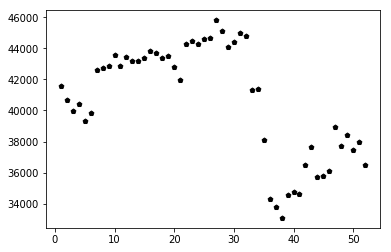

In [11]:
ipc2=ipc.drop(["x2","x3"], axis=1, inplace=False)
datos_y=[ipc2["close"]]
datos_x=[ipc2['week']]
import matplotlib.pyplot as plt
plt.scatter(x=datos_x , y=datos_y, marker='p', c='black', s=25)
plt.show()